# veld_step_6_analyse_vectors

This notebook is the final step of the VELD demonstration.

In the previous steps, word embeddings were trained on the bible using fastText, GloVe, and word2vec. Their vectors were exported to a common format, and are imported in this notebook.

This notebook evaluates the plausibility of the vectors by testing them qualitatively on a few sample words, defined below in the variable `WORD_LIST`.

The vectors for each word are loaded for each architecture, and their cosine similarity are evaluated pair-wise against each other. This demonstrates that "semantic relatedness" is indeed approximated via the trained word embeddings, since word pairs that are semantically closer to each other show higher cosine similiarty of their vectors.

Further, there is a also a 2D visualization at the end, plotting visually their relatedness within each respective architecture.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# config

Here, the sample words are defined. They may be adapted by changing their words to any other word occurring within the training data.

In [2]:
WORD_LIST = ["god", "jesus", "queen", "king", "woman", "man", "river", "tree", "horse"]

# load vectors

Loads the trained and exported word vectors into a consistent format (dictionary with keys being words and values their respective numpy vector)

In [3]:
def load_vectors(path_list):
    vector_dict_list = []
    for path in path_list:
        with open(path, "rb") as f:
            vector_dict_list.append(pickle.load(f))
    return vector_dict_list

vf, vg, vw = load_vectors(["/veld/input/fasttext/m1.pkl", "/veld/input/glove/m1.pkl", "/veld/input/word2vec/m1.pkl"])
print("len(vf):", len(vf))
print("len(vg):", len(vg))
print("len(vw):", len(vw))

len(vf): 5278
len(vg): 5278
len(vw): 5277


# check similarities

Checks the cosine similarity of each word pair of the sample list.

In [4]:
def get_cosine_similarity_of_vectors(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [5]:
def compare_words(vector_dict):
    for i1, w1 in enumerate(WORD_LIST):
        for w2 in WORD_LIST[i1:]:
            print(w1, w2, get_cosine_similarity_of_vectors(vector_dict[w1], vector_dict[w2]))

print("- fasttext ------------------------------")
compare_words(vf)
print("- glove ---------------------------------")
compare_words(vg)
print("- word2vec ------------------------------")
compare_words(vw)

- fasttext ------------------------------
god god 1.0
god jesus 0.42345178
god queen 0.1610835
god king 0.2738157
god woman 0.121852316
god man 0.2783959
god river 0.096043766
god tree 0.109210394
god horse 0.09110325
jesus jesus 1.0000001
jesus queen 0.1216659
jesus king 0.10144059
jesus woman 0.17912415
jesus man 0.2869914
jesus river 0.07637126
jesus tree 0.14968954
jesus horse 0.08513346
queen queen 1.0
queen king 0.38950437
queen woman 0.1165133
queen man 0.020967305
queen river 0.15472558
queen tree 0.0615516
queen horse 0.12426811
king king 1.0000001
king woman 0.14225836
king man 0.20714897
king river 0.25533786
king tree 0.08049496
king horse 0.22321266
woman woman 1.0000001
woman man 0.38436607
woman river 0.04096134
woman tree 0.17282553
woman horse 0.16284296
man man 1.0
man river 0.04632184
man tree 0.20713595
man horse 0.19504529
river river 1.0000001
river tree 0.10237309
river horse 0.15226258
tree tree 1.0000001
tree horse 0.16495588
horse horse 1.0
- glove -----------

# t-SNE plot

Reduces the higher dimensional vectors to 2D so that they can be visually plotted.

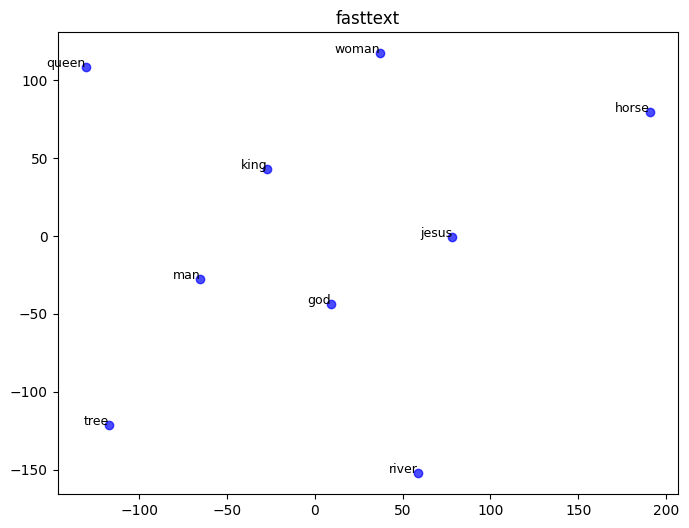

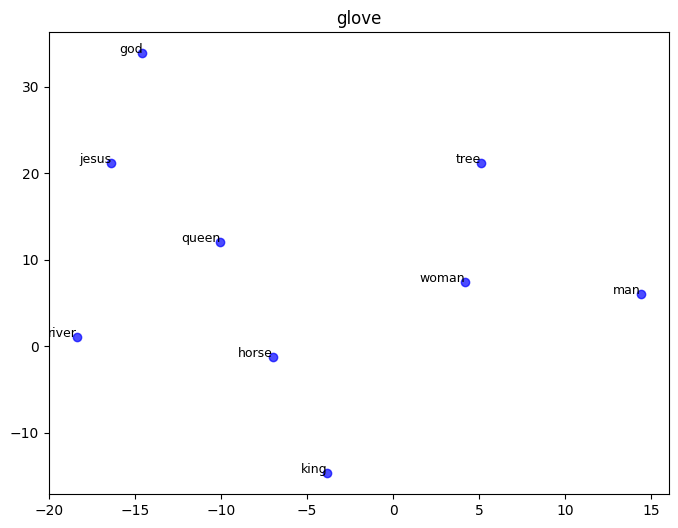

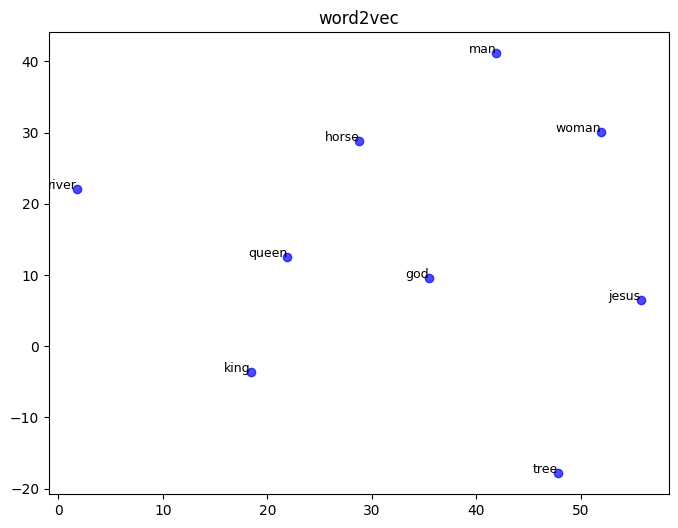

In [6]:
def show_plot_tsne(vector_dict, title):

    # get labels and values
    labels = []
    values = []
    for w in WORD_LIST:
        labels.append(w)
        values.append(vector_dict[w])
    values = np.array(values)

    # reduce
    tsne = TSNE(n_components=2, perplexity=5, random_state=42)
    reduced_vectors_tsne = tsne.fit_transform(values)
    
    # Plot the reduced vectors
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_vectors_tsne[:, 0], reduced_vectors_tsne[:, 1], c='blue', alpha=0.7)

    # Add labels
    for i, label in enumerate(labels):
        plt.text(
            reduced_vectors_tsne[i, 0], 
            reduced_vectors_tsne[i, 1], 
            label,
            fontsize=9, 
            ha="right", 
            color="black"
        )
        
    # plot
    plt.title(title)
    plt.show()

show_plot_tsne(vf, "fasttext")
show_plot_tsne(vg, "glove")
show_plot_tsne(vw, "word2vec")